In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd

# Load Data

In [3]:
from enfobench.dataset import DemandDataset

ds = DemandDataset("data")

In [4]:
unique_ids = ds.metadata_subset.list_unique_ids()

In [5]:
len(unique_ids)

100

In [6]:
unique_id = unique_ids[0]
unique_id

'70aec446c47486f3'

In [7]:
target, past_covariates, metadata = ds.get_data_by_unique_id(unique_id)

In [8]:
target.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24320 entries, 2012-10-09 08:30:00 to 2014-02-28 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       24317 non-null  float64
dtypes: float64(1)
memory usage: 380.0 KB


In [9]:
past_covariates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19862 entries, 2011-11-23 11:00:00 to 2014-02-28 00:00:00
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      19862 non-null  float32
 1   dew_point        19862 non-null  float32
 2   pressure         19862 non-null  float32
 3   wind_speed       19862 non-null  float32
 4   wind_gust        19862 non-null  float32
 5   wind_bearing     19862 non-null  float32
 6   precipitation    19862 non-null  float32
 7   snow             19862 non-null  float32
 8   cloud_cover      19862 non-null  float32
 9   solar_radiation  19862 non-null  float32
dtypes: float32(10)
memory usage: 931.0 KB


# Make external forecasts based on covariates

In [10]:
from enfobench.dataset.utils import create_perfect_forecasts_from_covariates

perfect_forecasts = create_perfect_forecasts_from_covariates(
    past_covariates,
    horizon=pd.Timedelta("7 days"),
    step=pd.Timedelta("24 hour"),
)

In [11]:
perfect_forecasts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137928 entries, 0 to 137927
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   timestamp        137928 non-null  datetime64[ns]
 1   cutoff_date      137928 non-null  datetime64[ns]
 2   temperature      137928 non-null  float32       
 3   dew_point        137928 non-null  float32       
 4   pressure         137928 non-null  float32       
 5   wind_speed       137928 non-null  float32       
 6   wind_gust        137928 non-null  float32       
 7   wind_bearing     137928 non-null  float32       
 8   precipitation    137928 non-null  float32       
 9   snow             137928 non-null  float32       
 10  cloud_cover      137928 non-null  float32       
 11  solar_radiation  137928 non-null  float32       
dtypes: datetime64[ns](2), float32(10)
memory usage: 7.4 MB


In [12]:
perfect_forecasts.head()

,timestamp,cutoff_date,temperature,dew_point,pressure,wind_speed,wind_gust,wind_bearing,precipitation,snow,cloud_cover,solar_radiation
0,2011-11-23 12:00:00,2011-11-23 11:00:00,8.515167,6.053314,1018.570374,3.163105,7.092710,227.930420,-2.328306e-07,0.0,1.0,247.303711
1,2011-11-23 13:00:00,2011-11-23 11:00:00,9.366150,6.898102,1018.497498,3.694861,7.186031,235.672974,-2.328306e-07,0.0,1.0,219.641495
2,2011-11-23 14:00:00,2011-11-23 11:00:00,9.818268,7.336670,1018.578125,3.870760,6.684762,234.186523,-2.328306e-07,0.0,1.0,151.042435
3,2011-11-23 15:00:00,2011-11-23 11:00:00,9.655426,7.545349,1018.738159,3.420094,5.839092,232.220032,-2.328306e-07,0.0,1.0,68.137222
4,2011-11-23 16:00:00,2011-11-23 11:00:00,9.179779,7.419464,1018.985535,3.134620,5.201840,221.905396,-2.328306e-07,0.0,1.0,15.961771


In [13]:
perfect_forecasts.tail()

,timestamp,cutoff_date,temperature,dew_point,pressure,wind_speed,wind_gust,wind_bearing,precipitation,snow,cloud_cover,solar_radiation
137923,2014-02-27 07:00:00,2014-02-20 11:00:00,6.506134,5.168854,995.314026,8.122930,15.462187,188.039062,1.058658,2.910383e-08,1.000000,0.000000
137924,2014-02-27 08:00:00,2014-02-20 11:00:00,6.726654,5.417999,995.132080,6.130317,11.876844,218.965332,0.727250,2.910383e-08,1.000000,5.516424
137925,2014-02-27 09:00:00,2014-02-20 11:00:00,7.474091,5.614899,996.073792,6.359778,12.091746,265.768311,0.092959,2.910383e-08,0.962584,37.017605
137926,2014-02-27 10:00:00,2014-02-20 11:00:00,7.983521,4.091736,996.695862,6.367825,12.284778,273.792236,0.002462,2.910383e-08,0.443670,203.822159
137927,2014-02-27 11:00:00,2014-02-20 11:00:00,8.863586,3.427490,997.391602,6.639326,13.095889,275.929749,0.002462,2.910383e-08,0.358461,357.286163


# Create Dataset

In [14]:
from enfobench.dataset import Dataset

dataset = Dataset(
    target=target.loc["2012-01-01":"2013-12-31"],
    past_covariates=past_covariates,
    future_covariates=perfect_forecasts,
    metadata=metadata
)

# Perform crossvalidation via server

In [17]:
from enfobench.evaluation import ForecastClient

client = ForecastClient(port=3010)

In [18]:
client.info()

ModelInfo(name='Statsforecast.SeasonalExponentialSmoothing.1D.A0.500', authors=[{'name': 'Attila Balint', 'email': 'attila.balint@kuleuven.be'}], type='point', params={'alpha': 0.5})

In [31]:
from enfobench.evaluation import cross_validate
crossval_df = cross_validate(
    client,
    dataset,
    start_date=pd.Timestamp("2013-01-01T00:00:00"),
    end_date=pd.Timestamp("2013-02-01T00:00:00"),
    horizon=pd.Timedelta("38 hours"), 
    step=pd.Timedelta("1 day"), 
)

100%|██████████| 30/30 [00:06<00:00,  4.46it/s]


In [32]:
crossval_df

,cutoff_date,timestamp,yhat,y
0,2013-01-01,2013-01-01 00:30:00,0.106710,0.303
1,2013-01-01,2013-01-01 01:00:00,0.102435,0.085
2,2013-01-01,2013-01-01 01:30:00,0.058707,0.270
3,2013-01-01,2013-01-01 02:00:00,0.026373,0.084
4,2013-01-01,2013-01-01 02:30:00,0.039834,0.184
...,...,...,...,...
2275,2013-01-30,2013-01-31 12:00:00,0.100316,0.086
2276,2013-01-30,2013-01-31 12:30:00,0.087095,0.095
2277,2013-01-30,2013-01-31 13:00:00,0.091801,0.024
2278,2013-01-30,2013-01-31 13:30:00,0.101424,0.023


# Evaluate metrics

In [33]:
from enfobench.evaluation import evaluate_metrics
from enfobench.evaluation.metrics import mean_absolute_error, mean_bias_error

In [34]:
 evaluate_metrics(
    crossval_df,
    metrics={
        "MAE": mean_absolute_error,
        "MBE": mean_bias_error
    },
)

,MAE,MBE,weight
0,0.10152,0.002554,1.0


In [35]:
metrics = evaluate_metrics(
    crossval_df,
    metrics={
        "MAE": mean_absolute_error,
        "MBE": mean_bias_error
    },
    groupby="cutoff_date"
)

100%|██████████| 30/30 [00:00<00:00, 73.04it/s]


In [36]:
metrics

,cutoff_date,MAE,MBE,weight
0,2013-01-01,0.094675,-0.034761,1.0
1,2013-01-02,0.104821,-0.038762,1.0
2,2013-01-03,0.152007,-0.025868,1.0
3,2013-01-04,0.154948,0.044060,1.0
4,2013-01-05,0.162049,0.021609,1.0
5,2013-01-06,0.117103,0.042916,1.0
6,2013-01-07,0.084649,0.064458,1.0
7,2013-01-08,0.096090,-0.001534,1.0
8,2013-01-09,0.070735,0.027082,1.0
9,2013-01-10,0.109133,-0.019709,1.0


<Axes: >

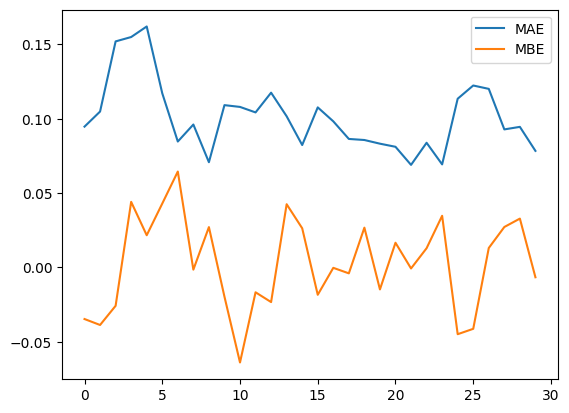

In [37]:
metrics[['MAE', "MBE"]].plot()